In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("A_year_of_pizza_sales_from_a_pizza_place_872_68.csv")

                

In [3]:
df

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...,...
49569,49570,49570,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,49571,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,49573,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [4]:
df.isnull().sum()

Unnamed: 0    0
X             0
id            0
date          0
time          0
name          0
size          0
type          0
price         0
dtype: int64

In [5]:
df = df.drop( columns = ["Unnamed: 0", "X"])

In [6]:
df

,id,date,time,name,size,type,price
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...
49569,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49574 non-null  object 
 1   date    49574 non-null  object 
 2   time    49574 non-null  object 
 3   name    49574 non-null  object 
 4   size    49574 non-null  object 
 5   type    49574 non-null  object 
 6   price   49574 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


In [8]:
df["name"].value_counts()

name
classic_dlx     2453
bbq_ckn         2432
hawaiian        2422
pepperoni       2418
thai_ckn        2371
cali_ckn        2370
sicilian        1938
spicy_ital      1924
southw_ckn      1917
big_meat        1914
four_cheese     1902
ital_supr       1884
veggie_veg      1526
mexicana        1484
napolitana      1464
prsc_argla      1457
spinach_fet     1446
peppr_salami    1446
ital_cpcllo     1438
the_greek       1420
five_cheese     1409
pep_msh_pep     1359
green_garden     997
ckn_alfredo      987
ital_veggie      981
ckn_pesto        973
spin_pesto       970
soppressata      961
spinach_supr     950
calabrese        937
mediterraneo     934
brie_carre       490
Name: count, dtype: int64

In [9]:
df["size"].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [10]:
df["type"].unique()

array(['classic', 'veggie', 'chicken', 'supreme'], dtype=object)

In [11]:
df_price = df["price"].value_counts()
df_price.sort_index(ascending = False)

price
35.95      28
25.50     552
23.65     490
21.00     190
20.75    8891
20.50    2026
20.25    3093
18.50    1409
17.95    1316
17.50     384
16.75    4380
16.50    4111
16.25    1136
16.00    4522
15.25     728
14.75     586
14.50     397
13.25     483
12.75    2529
12.50    3380
12.25     850
12.00    5744
11.00     578
10.50    1020
9.75      751
Name: count, dtype: int64

In [12]:
df["time"] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [13]:
df

,id,date,time,name,size,type,price
0,2015-000001,2015-01-01,2015-01-01 11:38:36,hawaiian,M,classic,13.25
1,2015-000002,2015-01-01,2015-01-01 11:57:40,classic_dlx,M,classic,16.00
2,2015-000002,2015-01-01,2015-01-01 11:57:40,mexicana,M,veggie,16.00
3,2015-000002,2015-01-01,2015-01-01 11:57:40,thai_ckn,L,chicken,20.75
4,2015-000002,2015-01-01,2015-01-01 11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...
49569,2015-021348,2015-12-31,2015-12-31 21:23:10,four_cheese,L,veggie,17.95
49570,2015-021348,2015-12-31,2015-12-31 21:23:10,napolitana,S,classic,12.00
49571,2015-021348,2015-12-31,2015-12-31 21:23:10,ckn_alfredo,M,chicken,16.75
49572,2015-021349,2015-12-31,2015-12-31 22:09:54,mexicana,L,veggie,20.25


In [14]:
df = df.drop(columns = ["date"])

In [15]:
df

,id,time,name,size,type,price
0,2015-000001,2015-01-01 11:38:36,hawaiian,M,classic,13.25
1,2015-000002,2015-01-01 11:57:40,classic_dlx,M,classic,16.00
2,2015-000002,2015-01-01 11:57:40,mexicana,M,veggie,16.00
3,2015-000002,2015-01-01 11:57:40,thai_ckn,L,chicken,20.75
4,2015-000002,2015-01-01 11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...
49569,2015-021348,2015-12-31 21:23:10,four_cheese,L,veggie,17.95
49570,2015-021348,2015-12-31 21:23:10,napolitana,S,classic,12.00
49571,2015-021348,2015-12-31 21:23:10,ckn_alfredo,M,chicken,16.75
49572,2015-021349,2015-12-31 22:09:54,mexicana,L,veggie,20.25


In [16]:
df.duplicated().sum()

954

In [17]:
df["weekday nº"] = df['time'].dt.weekday

In [18]:
df

,id,time,name,size,type,price,weekday nº
0,2015-000001,2015-01-01 11:38:36,hawaiian,M,classic,13.25,3
1,2015-000002,2015-01-01 11:57:40,classic_dlx,M,classic,16.00,3
2,2015-000002,2015-01-01 11:57:40,mexicana,M,veggie,16.00,3
3,2015-000002,2015-01-01 11:57:40,thai_ckn,L,chicken,20.75,3
4,2015-000002,2015-01-01 11:57:40,five_cheese,L,veggie,18.50,3
...,...,...,...,...,...,...,...
49569,2015-021348,2015-12-31 21:23:10,four_cheese,L,veggie,17.95,3
49570,2015-021348,2015-12-31 21:23:10,napolitana,S,classic,12.00,3
49571,2015-021348,2015-12-31 21:23:10,ckn_alfredo,M,chicken,16.75,3
49572,2015-021349,2015-12-31 22:09:54,mexicana,L,veggie,20.25,3


In [19]:
df2 = df.copy()

In [20]:
df2 = df2.drop(columns = ["time"])

In [21]:
df2 = df2.drop(columns = ["price"])

In [22]:
df2 = df2.drop(columns = ["id"])

In [23]:
df2

,name,size,type,weekday nº
0,hawaiian,M,classic,3
1,classic_dlx,M,classic,3
2,mexicana,M,veggie,3
3,thai_ckn,L,chicken,3
4,five_cheese,L,veggie,3
...,...,...,...,...
49569,four_cheese,L,veggie,3
49570,napolitana,S,classic,3
49571,ckn_alfredo,M,chicken,3
49572,mexicana,L,veggie,3


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#Create a dictionary that converts the possible result in the "name" column into an defined integer

dict_name = {"bbq_ckn": 1, "big_meat": 2, "brie_carre": 3, "calabrese": 4, "cali_ckn": 5, "ckn_alfredo": 6, "ckn_pesto": 7, "classic_dlx": 8, "five_cheese": 9, "four_cheese": 10,
             "green_garden": 11, "hawaiian": 12, "ital_cpcllo": 13, "ital_supr": 14, "ital_veggie": 15, "mediterraneo": 16, "mexicana": 17, "napolitana": 18, "pep_msh_pep": 19,
             "pepperoni": 20, "peppr_salami": 21, "prsc_argla": 22, "sicilian": 23, "soppressata": 24, "southw_ckn": 25, "spicy_ital": 26, "spin_pesto": 27, "spinach_fet": 28,
             "spinach_supr": 29, "thai_ckn": 30, "the_greek": 31, "veggie_veg": 32}

#use the "map" function to create the new column filtering the values in the name column

df2["name_number"] = df2["name"].map(dict_name)

In [26]:
df2

,name,size,type,weekday nº,name_number
0,hawaiian,M,classic,3,12
1,classic_dlx,M,classic,3,8
2,mexicana,M,veggie,3,17
3,thai_ckn,L,chicken,3,30
4,five_cheese,L,veggie,3,9
...,...,...,...,...,...
49569,four_cheese,L,veggie,3,10
49570,napolitana,S,classic,3,18
49571,ckn_alfredo,M,chicken,3,6
49572,mexicana,L,veggie,3,17


In [27]:
df2["size"].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [28]:
#Do the same proccess with the size and type column

dict_size = {"S": 1, "M": 2, "L": 3, "XL": 4, "XXL": 5}

df2["size_to_number"] = df2["size"].map(dict_size)
df2

,name,size,type,weekday nº,name_number,size_to_number
0,hawaiian,M,classic,3,12,2
1,classic_dlx,M,classic,3,8,2
2,mexicana,M,veggie,3,17,2
3,thai_ckn,L,chicken,3,30,3
4,five_cheese,L,veggie,3,9,3
...,...,...,...,...,...,...
49569,four_cheese,L,veggie,3,10,3
49570,napolitana,S,classic,3,18,1
49571,ckn_alfredo,M,chicken,3,6,2
49572,mexicana,L,veggie,3,17,3


In [29]:
df["type"].unique()

array(['classic', 'veggie', 'chicken', 'supreme'], dtype=object)

In [30]:
#Repeat the process in the type column

dict_type = {"classic": 1, "veggie": 2, "chicken": 3, "supreme": 4}

df2["type_to_number"] = df2["type"].map(dict_type)
df2

,name,size,type,weekday nº,name_number,size_to_number,type_to_number
0,hawaiian,M,classic,3,12,2,1
1,classic_dlx,M,classic,3,8,2,1
2,mexicana,M,veggie,3,17,2,2
3,thai_ckn,L,chicken,3,30,3,3
4,five_cheese,L,veggie,3,9,3,2
...,...,...,...,...,...,...,...
49569,four_cheese,L,veggie,3,10,3,2
49570,napolitana,S,classic,3,18,1,1
49571,ckn_alfredo,M,chicken,3,6,2,3
49572,mexicana,L,veggie,3,17,3,2


In [31]:
features = df2.drop(columns = ["name_number", "name", "size", "type"])
target = df2["name_number"]
df_num = df2.drop(columns = ["name", "size", "type"])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=20)

In [33]:
#normalization of the values in the new columns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

normalizer = MinMaxScaler()

normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [34]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,weekday nº,size_to_number,type_to_number
0,0.666667,0.00,1.000000
1,0.500000,0.25,0.000000
2,0.833333,0.25,1.000000
3,0.166667,0.00,0.333333
4,0.166667,0.00,1.000000


In [35]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,weekday nº,size_to_number,type_to_number
0,0.166667,0.50,0.666667
1,0.166667,0.50,0.333333
2,0.833333,0.25,0.000000
3,0.833333,0.50,0.000000
4,0.166667,0.25,1.000000


In [36]:
#training KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train_norm, y_train)

print(f"The R2 of the model on the TEST set is: {knn.score(X_test_norm, y_test): .2f}")

The R2 of the model on the TEST set is:  0.07


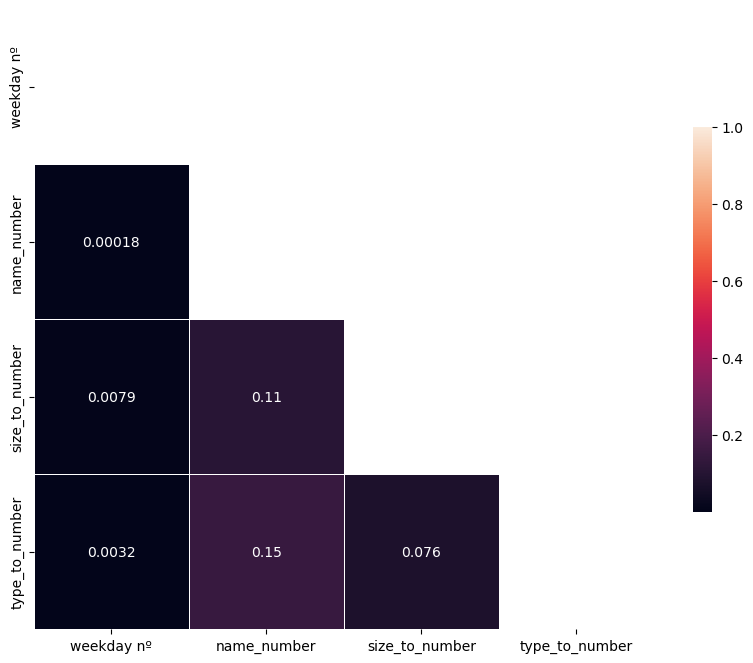

In [37]:
#correlation headmap

corr=np.abs(df_num.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [38]:
#linear regression model

lin_reg = LinearRegression()

lin_reg.fit(X_train_norm, y_train)

pred = lin_reg.predict(X_test_norm)

print(f"MAE {mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE, {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score, {lin_reg.score(X_test_norm, y_test): .2f}")

MAE  7.86
RMSE,  9.19
R2 score,  0.03


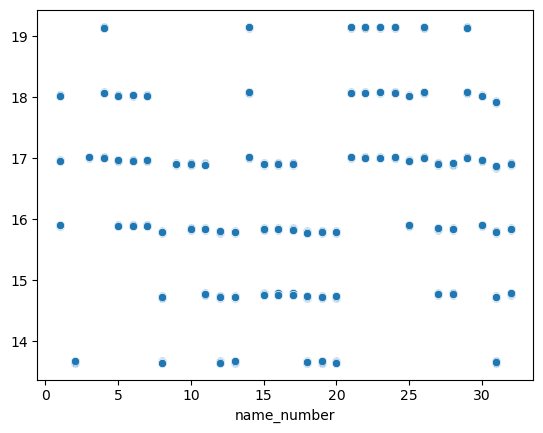

In [39]:
sns.scatterplot(x=y_test, y=pred);

In [40]:
#bagging and pasting

bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

bagging_reg.fit(X_train_norm, y_train)

pred = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 7.131402503064375
RMSE 8.50152371924956
R2 score 0.17172089925895717


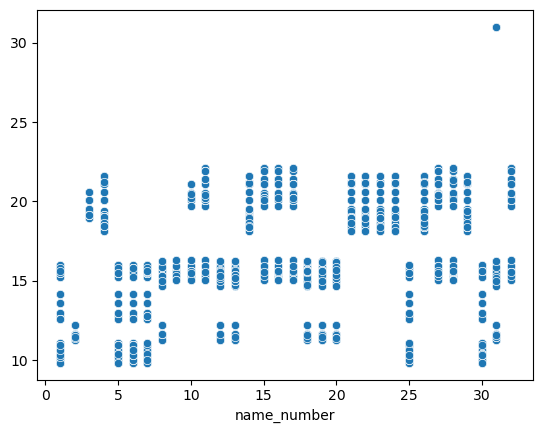

In [41]:
sns.scatterplot(x=y_test, y=pred);

In [42]:
#Random forest method

forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

forest.fit(X_train_norm, y_train)

pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 7.134957796023212
RMSE 8.499278899760993
R2 score 0.17215825417334485


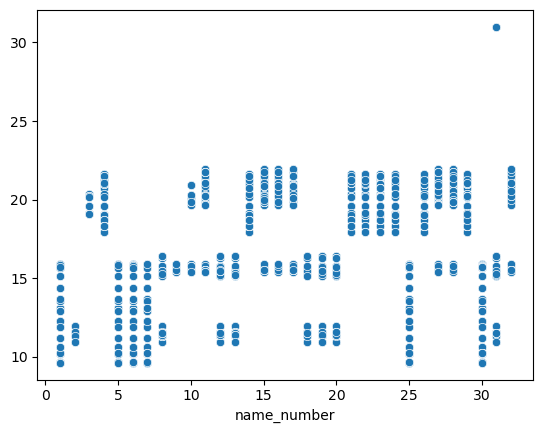

In [43]:
sns.scatterplot(x=y_test, y=pred);

In [44]:
#AdaBoost

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

ada_reg.fit(X_train_norm, y_train)

pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 7.302024742895898
RMSE 8.537981324604605
R2 score 0.1646017470794675


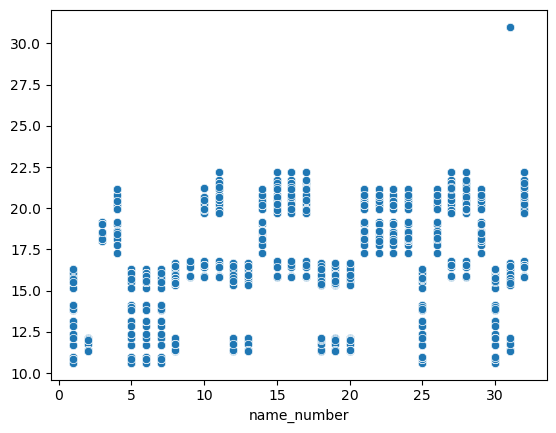

In [45]:
sns.scatterplot(x=y_test, y=pred);

In [46]:
#Gradient boosting

gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

gb_reg.fit(X_train_norm, y_train)

pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 7.133461808043511
RMSE 8.498770828439199
R2 score 0.17225722494099982


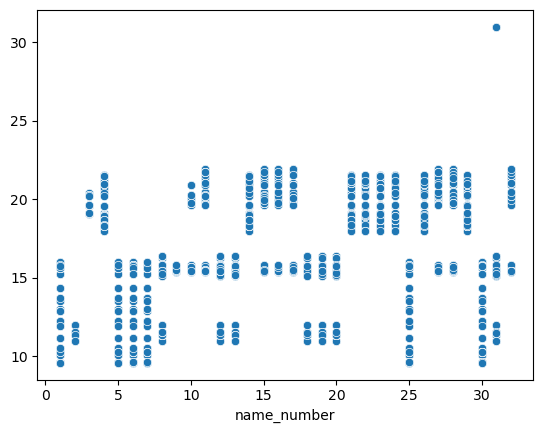

In [47]:
sns.scatterplot(x=y_test, y=pred);

In [48]:
df2.to_csv("test_error.csv")